## 데이터 다운로드

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/tmp/flowers_prepared.zip ./

In [ ]:
!unzip flowers_prepared.zip

Archive:  flowers_prepared.zip
   creating: flowers_prepared/test/
   creating: flowers_prepared/test/daisy/
  inflating: flowers_prepared/test/daisy/401.jpg  
  inflating: flowers_prepared/test/daisy/402.jpg  
  inflating: flowers_prepared/test/daisy/403.jpg  
  inflating: flowers_prepared/test/daisy/404.jpg  
  inflating: flowers_prepared/test/daisy/405.jpg  
  inflating: flowers_prepared/test/daisy/406.jpg  
  inflating: flowers_prepared/test/daisy/407.jpg  
  inflating: flowers_prepared/test/daisy/408.jpg  
  inflating: flowers_prepared/test/daisy/409.jpg  
  inflating: flowers_prepared/test/daisy/410.jpg  
  inflating: flowers_prepared/test/daisy/411.jpg  
  inflating: flowers_prepared/test/daisy/412.jpg  
  inflating: flowers_prepared/test/daisy/413.jpg  
  inflating: flowers_prepared/test/daisy/414.jpg  
  inflating: flowers_prepared/test/daisy/415.jpg  
  inflating: flowers_prepared/test/daisy/416.jpg  
  inflating: flowers_prepared/test/daisy/417.jpg  
  inflating: flowers_pre

## 로스 실시간 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

## 학습

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_5 (Flatten)         (None, 68992)             0         
                                                                 
 dense_33 (Dense)            (None, 256)               17662208  
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_34 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 25,433,086
Trainable params: 17,664,005
Non-trainable params: 7,769,081
_________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


32/32 [==============================] - 32s 749ms/step - loss: 0.8184 - acc: 0.7720 - val_loss: 0.7320 - val_acc: 0.8294
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 0.2805 - acc: 0.9010
Epoch 00002: val_loss improved from 0.73195 to 0.35088, saving model to best_model.h5
32/32 [==============================] - 22s 690ms/step - loss: 0.2805 - acc: 0.9010 - val_loss: 0.3509 - val_acc: 0.9100
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 0.2157 - acc: 0.9275
Epoch 00003: val_loss did not improve from 0.35088
32/32 [==============================] - 21s 665ms/step - loss: 0.2157 - acc: 0.9275 - val_loss: 0.5063 - val_acc: 0.8720
Epoch 4/20
32/32 [==============================] - ETA: 0s - loss: 0.1714 - acc: 0.9405
Epoch 00004: val_loss improved from 0.35088 to 0.22816, saving model to best_model.h5
32/32 [==============================] - 22s 697ms/step - loss: 0.1714 - acc: 0.9405 - val_loss: 0.2282 - val_acc: 0.9289
Epoch 5/20
32/32 [====

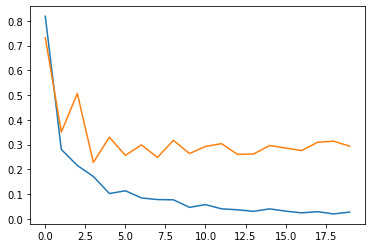

4/4 [==============================] - 1s 102ms/step - loss: 0.2935 - acc: 0.9289
loss= 0.2934949994087219
acc= 0.928909957408905


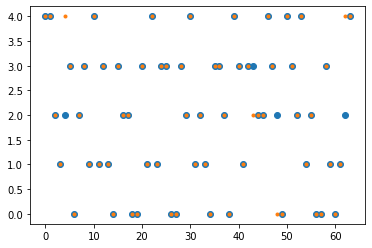

label category index = 4.0
predicted category index = 4
predicted category name = tulip


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "flowers_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "flowers_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

# 모델 저장 - ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
#
plot_losses = PlotLosses()
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=20,
      callbacks=[model_check_point]
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


## 모델 적용해보기

In [ ]:
reconstructed_model = keras.models.load_model("best_model.h5")

Found 211 images belonging to 5 classes.


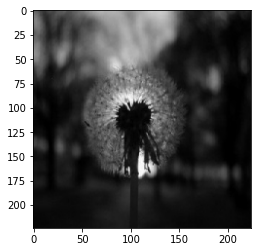

test_y = 1 , predicted = 1


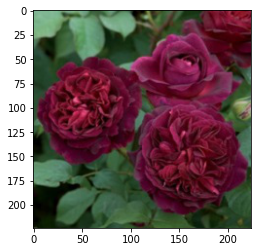

test_y = 2 , predicted = 2


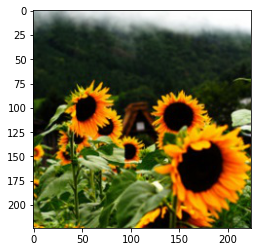

test_y = 3 , predicted = 3


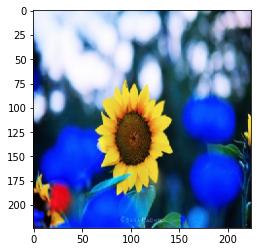

test_y = 3 , predicted = 0


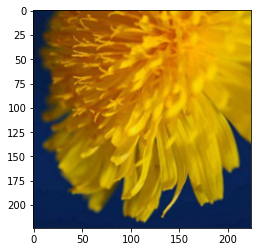

test_y = 1 , predicted = 1


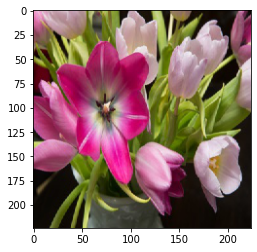

test_y = 4 , predicted = 4


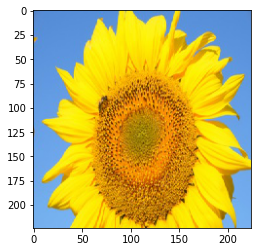

test_y = 3 , predicted = 3


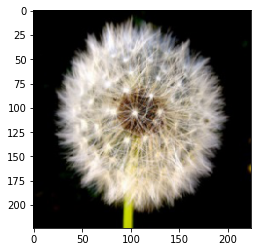

test_y = 1 , predicted = 1


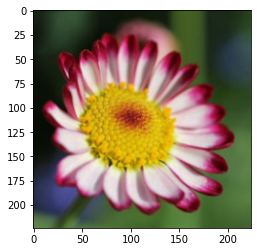

test_y = 0 , predicted = 0


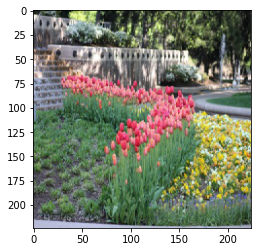

test_y = 4 , predicted = 4


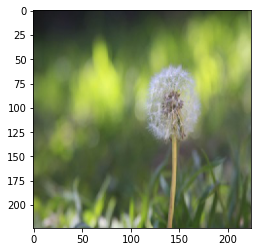

test_y = 1 , predicted = 1


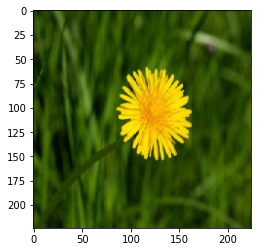

test_y = 1 , predicted = 1


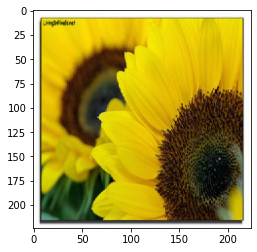

test_y = 3 , predicted = 3


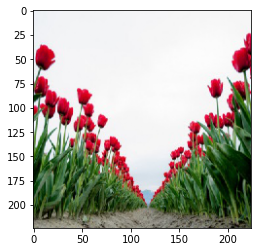

test_y = 4 , predicted = 3


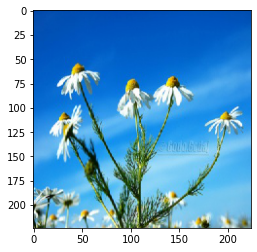

test_y = 0 , predicted = 0


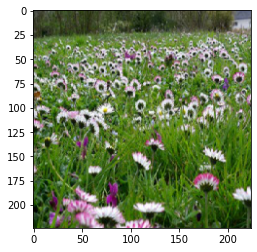

test_y = 0 , predicted = 0


In [ ]:
from tensorflow.keras.applications import vgg16

test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "flowers_prepared/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse'
)


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고(내가 만든 모델을 넣었다)
  y_ = reconstructed_model.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break

